# **Problem statement:**
1. Meskipun vaksin sudah mulai tersedia, pandemi COVID-19 tidak akan segera berakhir. Vaksin COVID-19 sudah tersedia 
di Indonesia dan dibagikan secara gratis dan bertahap, tapi distribusinya lebih lambat dari rencana. Selain 
kesulitan distribusi vaksin, golongan yang menolak vaksinasi juga akan menghambat pembangunan herd immunity dan 
penyelesaian pandemi. Virus COVID-19 juga telah bermutasi menjadi beberapa strain baru yang lebih mudah 
menular dan dapat menginfeksi kembali orang sebelumnya yang telah sembuh dari COVID-19 sehingga vaksin mungkin 
tidak seefektif yang diharapkan.
2. Indonesia sebagai negara berkembang dengan jumlah populasi terbesar nomor 4 di dunia bisa menerima dampak yang 
sangat besar dari COVID-19 jika pandemi tidak ditangani dengan baik dan berlangsung lama. Kapasitas layanan 
kesehatan dan jumlah tes di Indonesia kurang memadai, sedangkan lockdown total tidak memungkinkan. Pemerintah dan 
rumah sakit perlu mengantisipasi lonjakan jumlah kasus agar tidak terjadi lonjakan kematian seperti di Italia. Peramalan 
jumlah kasus COVID-19 dapat membantu mengantisipasi lonjakan kasus sehingga persiapan bisa lebih matang dan 
meminimalkan dampaknya.

Disusun Oleh Tim *Future Intelligence*
1. Yudhi Ahmadi
2. Auliyya Aini
3. Danny Albert Tandoro

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Daily Update Data Agregat Covid-19 Jakarta.csv')

In [ ]:
df.head()

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,01-03-2020,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,02-03-2020,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,03-03-2020,NaN,NaN,1.0,0.0,0.0,2.0,3.0,3.0,2.0,0.0,NaN,NaN,NaN
3,04-03-2020,NaN,NaN,1.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,NaN,NaN,NaN
4,05-03-2020,NaN,NaN,3.0,0.0,0.0,4.0,7.0,4.0,4.0,0.0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tanggal          854 non-null    object 
 1   Jam              0 non-null      float64
 2   Tanggal Jam      0 non-null      float64
 3   Meninggal        854 non-null    float64
 4   Sembuh           854 non-null    float64
 5   Self Isolation   854 non-null    float64
 6   Masih Perawatan  854 non-null    float64
 7   Total Pasien     854 non-null    float64
 8   Positif Harian   854 non-null    float64
 9   Positif Aktif    854 non-null    float64
 10  Sembuh Harian    854 non-null    float64
 11  Tanpa Gejala     714 non-null    float64
 12  Bergejala        714 non-null    float64
 13  Belum Ada Data   714 non-null    float64
dtypes: float64(13), object(1)
memory usage: 328.5+ KB


In [ ]:
#Menghilangkan Kolom yang Tidak Digunakan
df2 = df.drop(["Jam", "Tanggal Jam", "Meninggal", "Sembuh", "Self Isolation", "Masih Perawatan", "Total Pasien", "Positif Aktif", "Sembuh Harian", "Tanpa Gejala", "Bergejala", "Belum Ada Data"],axis=1)

In [ ]:
df2

,Tanggal,Positif Harian
0,01-03-2020,0.0
1,02-03-2020,0.0
2,03-03-2020,3.0
3,04-03-2020,0.0
4,05-03-2020,4.0
...,...,...
2997,NaN,NaN
2998,NaN,NaN
2999,NaN,NaN
3000,NaN,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         854 non-null    object 
 1   Positif Harian  854 non-null    float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
df2.isnull().sum()

Tanggal           2148
Positif Harian    2148
dtype: int64

In [ ]:
df2 = df2.dropna(axis = 0, how ='any')

In [ ]:
df2.isnull().sum()

Tanggal           0
Positif Harian    0
dtype: int64

In [ ]:
print(df2.dtypes)

Tanggal            object
Positif Harian    float64
dtype: object


In [ ]:
# merubah tipe data object to datetime
df2['Tanggal'] = pd.to_datetime(df2['Tanggal'], format = '%d-%m-%Y')

# melihat tipe data dataframe
print(df2.dtypes)

Tanggal           datetime64[ns]
Positif Harian           float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.shape

(854, 2)

In [ ]:
df2.describe()

,Positif Harian
count,854.000000
mean,1489.255269
std,2520.624784
min,0.000000
25%,131.000000
50%,671.000000
75%,1409.000000
max,15825.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60d3e321d0>,
      dtype=object)

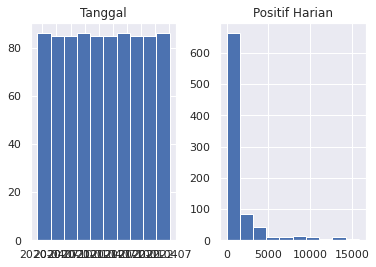

In [ ]:
df2.hist()

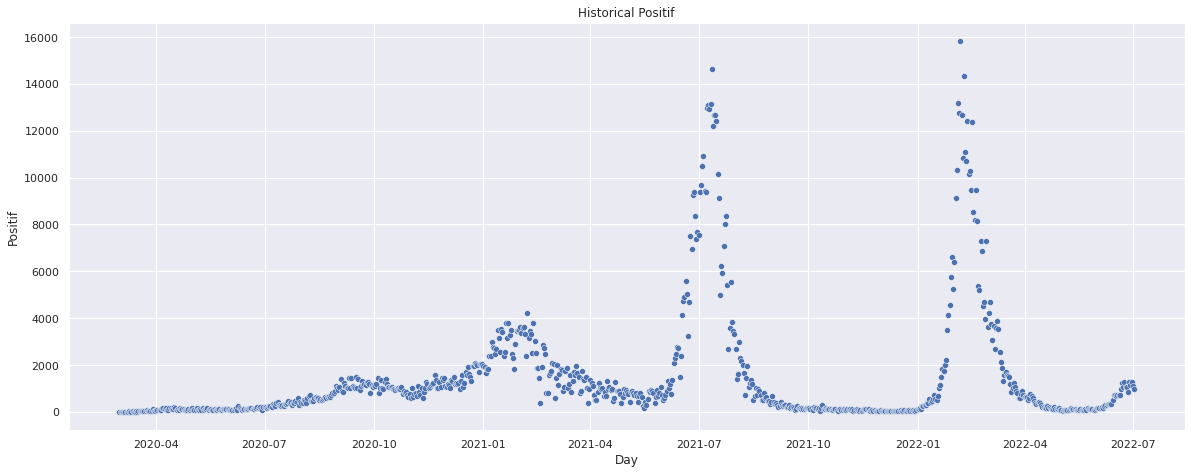

In [ ]:
plt.figure(figsize=[20, 7.5]); 

sns.scatterplot(x=df2['Tanggal'], y=df2['Positif Harian']);
plt.title('Historical Positif');
plt.ylabel('Positif');
plt.xlabel('Day');

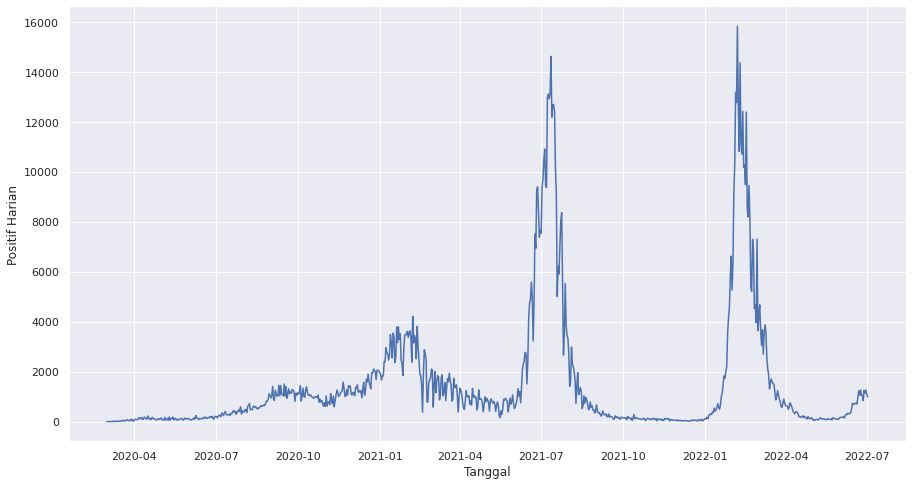

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df2, x=df2['Tanggal'], y=df2['Positif Harian'])

In [ ]:
# split data
train_size = int(len(df2) * 0.9) # Menentukan banyaknya data train yaitu sebesar 90% data
train = df2[:train_size]
test =df2[train_size:].reset_index(drop=True)

scaler = StandardScaler()
scaler.fit(train[['Positif Harian']])

train['scaled'] = scaler.transform(train[['Positif Harian']])
test['scaled'] = scaler.transform(test[['Positif Harian']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
train.head()

,Tanggal,Positif Harian,scaled
0,2020-03-01,0.0,-0.616594
1,2020-03-02,0.0,-0.616594
2,2020-03-03,3.0,-0.615450
3,2020-03-04,0.0,-0.616594
4,2020-03-05,4.0,-0.615069


In [ ]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y

In [ ]:
window_size = 24

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(744, 24, 1) (744, 1)
(62, 24, 1) (62, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM 

In [ ]:
def create_model(LSTM_unit=256, dropout=0.5): 
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [ ]:
LSTM_unit = [16,32,64]
dropout = [0.1,0.2]


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [16,32,64]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

In [ ]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
21/21 [==============================] - 2s 29ms/step - loss: 0.4660 - mae: 0.3953 - val_loss: 2.0567 - val_mae: 0.9365
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 0.1855 - mae: 0.2110 - val_loss: 1.1636 - val_mae: 0.8380
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.1287 - mae: 0.1937 - val_loss: 0.6953 - val_mae: 0.5757
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0961 - mae: 0.1660 - val_loss: 0.5371 - val_mae: 0.4673
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0836 - mae: 0.1591 - val_loss: 0.4060 - val_mae: 0.4099
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0721 - mae: 0.1490 - val_loss: 0.3497 - val_mae: 0.3707
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0714 - mae: 0.1418 - val_loss: 0.3050 - val_mae: 0.3661
Epoch 8/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0595 - mae: 0.1

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model = grid_result.best_estimator_.model

Best: -0.130935 using {'LSTM_unit': 32, 'dropout': 0.2}
-0.191076 (0.294816) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.193447 (0.248675) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.243012 (0.391362) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.130935 (0.172397) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.227614 (0.358309) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.337011 (0.590736) with: {'LSTM_unit': 64, 'dropout': 0.2}


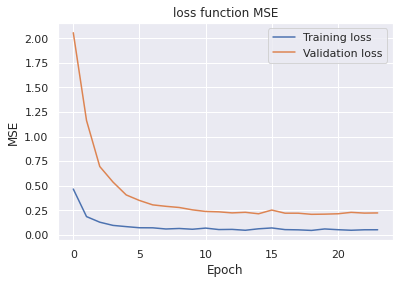

In [ ]:
history = best_model.history
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

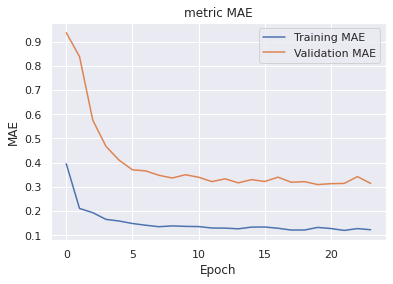

In [ ]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

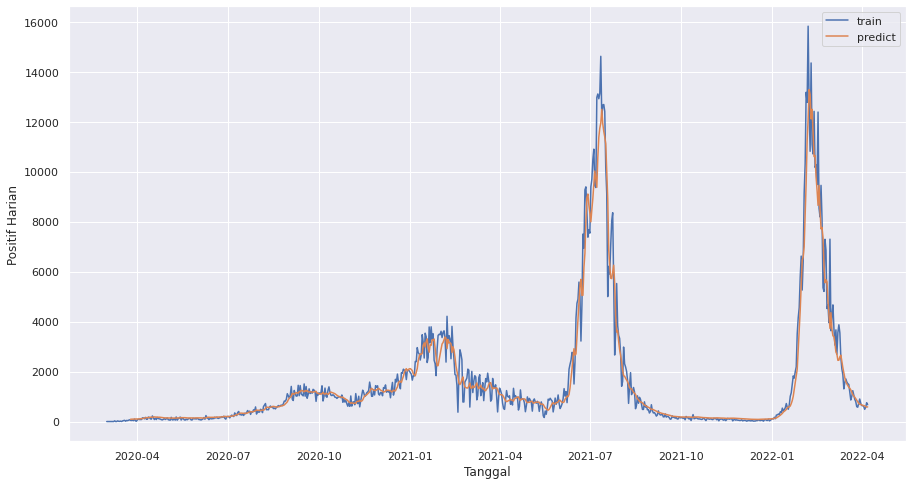

In [ ]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=train, x='Tanggal', y='Positif Harian', label = 'train')
sns.lineplot(data=train, x='Tanggal', y='predict', label = 'predict')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


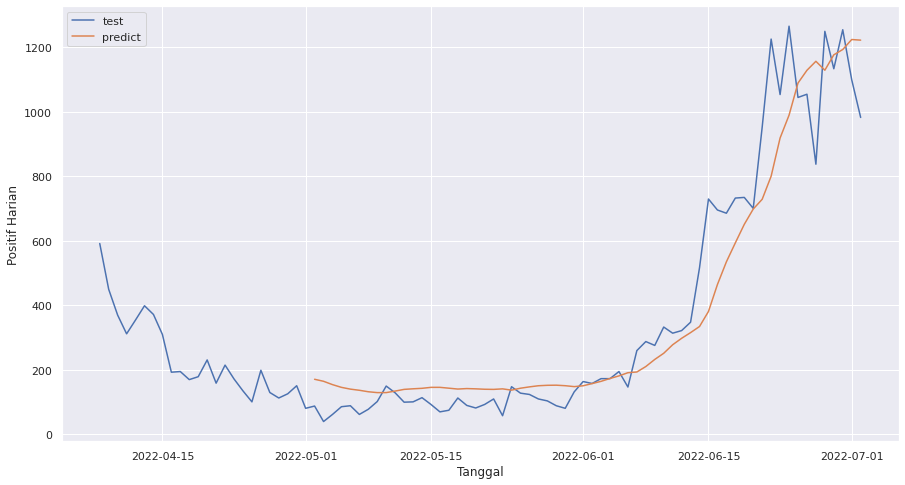

In [ ]:
test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test, x='Tanggal', y='Positif Harian', label = 'test')
sns.lineplot(data=test, x='Tanggal', y='predict', label = 'predict')

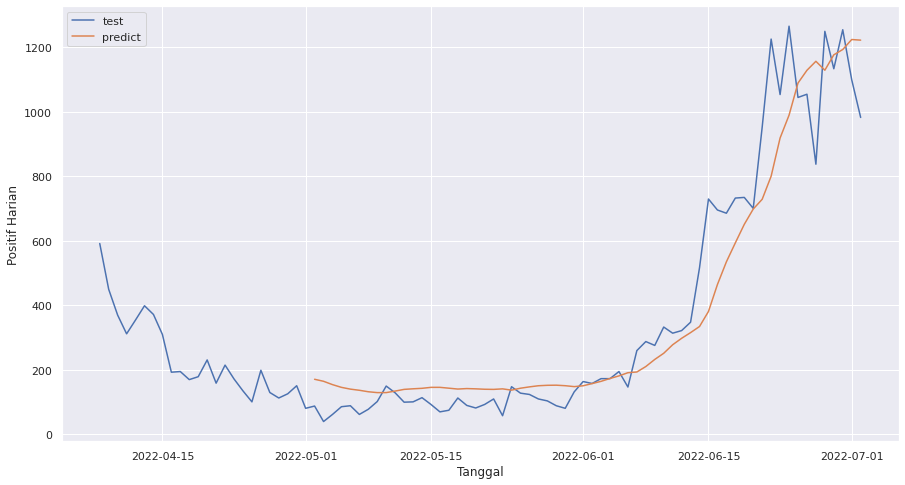

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-24*30:], x='Tanggal', y='Positif Harian', label = 'test')
sns.lineplot(data=test[-24*30:], x='Tanggal', y='predict', label = 'predict')

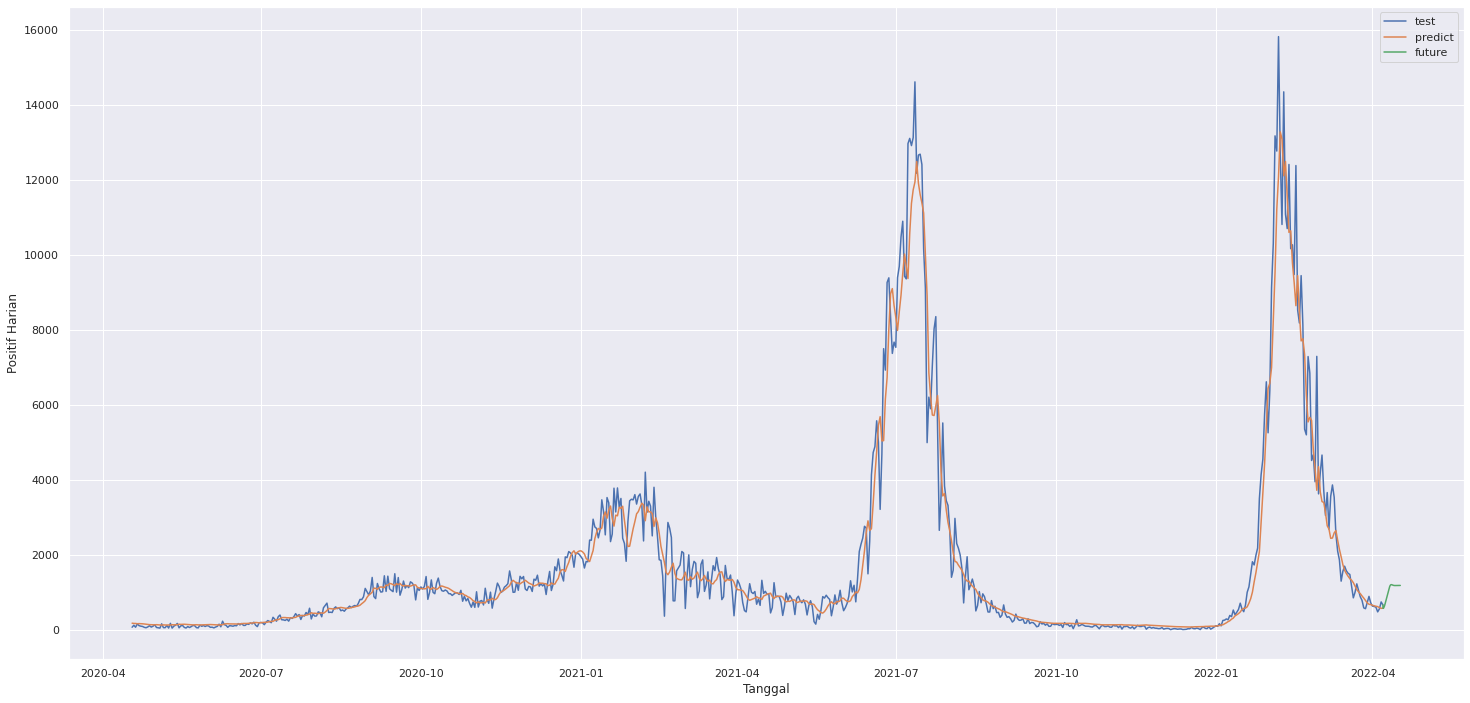

In [ ]:
# forecasting data selanjutnya
y_test = scaler.transform(train[['Positif Harian']])
n_future = 24*10
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=train['Tanggal'].values[-1], periods=n_future+1, freq='H')

# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(25,12))
sns.lineplot(data=train[-24*30:], x='Tanggal', y='Positif Harian', label = 'test')
sns.lineplot(data=train[-24*30:], x='Tanggal', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('Positif Harian');


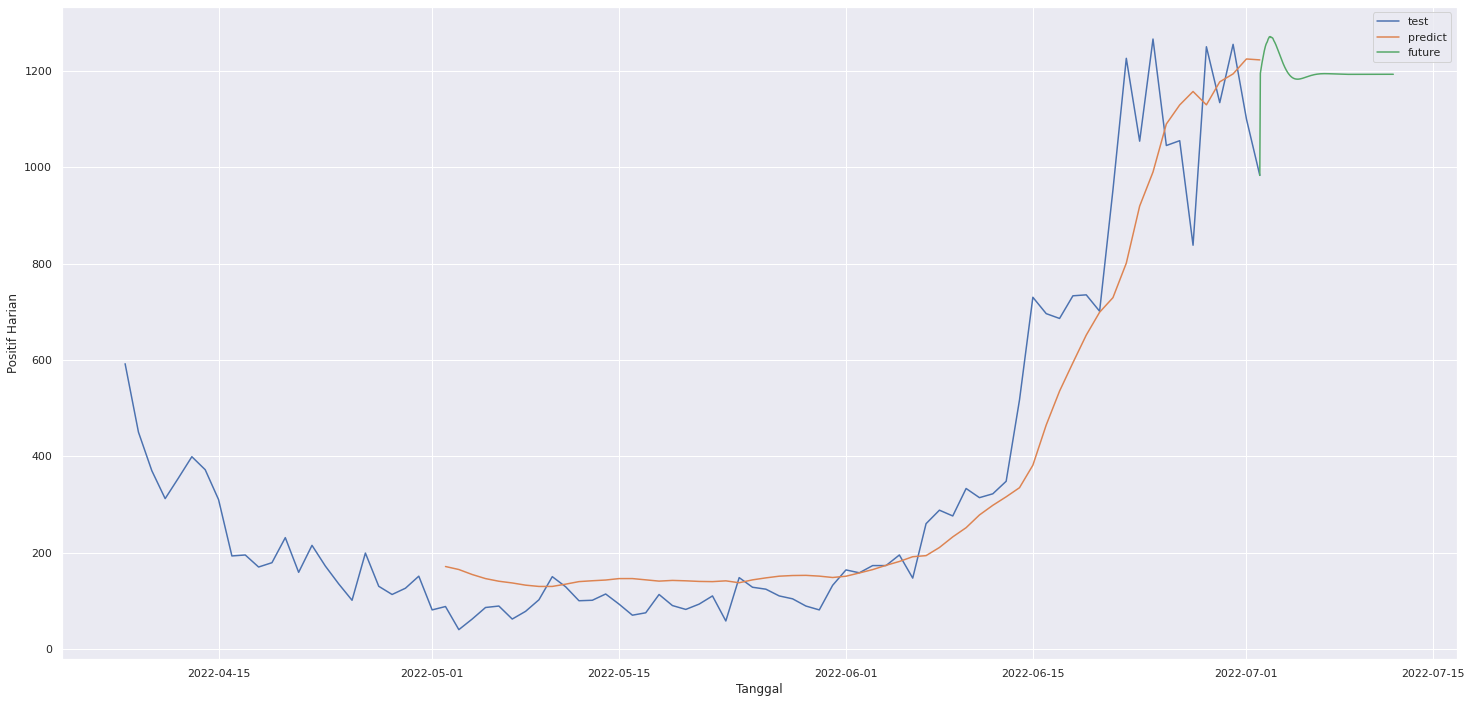

In [ ]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['Positif Harian']])
n_future = 24*10
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test['Tanggal'].values[-1], periods=n_future+1, freq='H')

# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(25,12))
sns.lineplot(data=test[-24*30:], x='Tanggal', y='Positif Harian', label = 'test')
sns.lineplot(data=test[-24*30:], x='Tanggal', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('Positif Harian');

# Interpretasi

Orang-orang mulai beradaptasi kembali akan varian baru tersebut dari mulai dari adanya kebijakan atau peraturan yang baru lagi, PPKM, dan lain-lain, yang mana di situasi itu masih terdapat kenaikan penyebaran virus COVID-19. Namun, adanya muncul kekebalan tahan tubuh kembali dan faktor-faktor lain yang menyebabkan menurunnya penyebaran virus covid 19, dan karena sudah terbiasa jumlah penyebaran sendiri tidak mengalami kenaikan maupun penurunan jadi konstan. Namun ada kemungkinan naik dan turun tergantung pola hidup manusia itu sendiri.

Ditambah dengan adanya libur lebaran pada 2 Mei 2022 yang mempercepat penyebaran dengan mobilisasi masyarakat. Seruan presiden jokowi terkait dengan pencabutan kewajiban pemakaian masker di lokasi terbuka pada 18 Mei juga dipercaya mempercepat peningkatan kasus covid

Berdasarkan tren naik turunnya kasus terkonfirmasi harian, diperkirakan adanya lonjakan kasus positif covid pada satu minggu kedepan. Agar dapat memperlambat kenaikan kasus positif serta memperkecil dampaknya, diperlukan adanya pembatasan jumlah pengunjung serta pemakaian masker di area tertentu yang disinyalir menjadi pusat mobilisasi masyarakat seperti stasiun, pasar, hingga tempat wisata.

Pemakaian masker sangat direkomendasikan untuk mencegah penyebaran Virus Corona. Penelitian pada influenza dan Virus Covid pada manusia menghasilkan bukti bahwa pemakaian masker medis dapat mencegah penyebaran virus yang diakibatkan oleh transmisi virus dari orang yang terjangkit penyakit serta kontaminasi udara dari virus (Yudhastuti R 2020). Namun, dengan berkaca pada langkanya masker medis di Indonesia beberapa waktu lalu, disarankan setidaknya dengan memakai masker kain saat melakukan kegiatan diluar rumah.

# Daftar Pustaka
Yudhastuti R. 2020. The use of cloth face mask during the oandemic period in Indonesia People. Kesmas: Jurnal Kesehatan Masyarakat Nasional (National Public Health Journal). Special Issue (I):32-36